In [ ]:
%pip install 'vanna[ollama]'

In [12]:
from vanna.ollama import Ollama
from vanna.vannadb import VannaDB_VectorStore


In [13]:
class MyVanna(VannaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        MY_VANNA_MODEL = "kwakmodel"# Your model name from https://vanna.ai/account/profile
        VannaDB_VectorStore.__init__(self, vanna_model=MY_VANNA_MODEL, vanna_api_key="c267726a145a40db894425294a0d7fee", config=config)
        Ollama.__init__(self, config=config)

vn = MyVanna(config={'model': 'llama3.1'})


In [14]:
import pandas as pd
import sqlite3

df = pd.read_csv('data/players.csv')

# Create a SQLite database and write the data to a table
connection = sqlite3.connect("data/players.db")
df.to_sql(name="players", con=connection, if_exists='replace', index=False)



361835

In [15]:
vn.connect_to_sqlite('data/players.db')

In [16]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

for ddl in df_ddl['sql'].to_list():
  vn.train(ddl=ddl)


Adding ddl: CREATE TABLE "players" (
"LAST_NAME" TEXT,
  "OTHER_NAMES" TEXT,
  "MOBILE" INTEGER,
  "PROMOTIONAL_CONSENT" TEXT,
  "CREATED" TEXT,
  "E_Score" INTEGER,
  "Indicative_Segment" TEXT,
  "Gear" INTEGER,
  "D301" INTEGER,
  "D304" INTEGER,
  "D307" INTEGER,
  "D308" INTEGER,
  "D309" INTEGER,
  "D310" INTEGER,
  "D311" INTEGER,
  "D312" INTEGER,
  "D313" INTEGER,
  "D314" INTEGER,
  "D315" INTEGER,
  "D316" INTEGER,
  "D317" INTEGER,
  "D318" INTEGER,
  "D319" INTEGER,
  "D320" INTEGER,
  "D321" INTEGER,
  "D322" INTEGER,
  "D323" INTEGER,
  "D324" INTEGER,
  "D325" INTEGER,
  "D326" INTEGER,
  "D327" INTEGER,
  "D328" INTEGER,
  "D329" INTEGER,
  "D330" INTEGER,
  "D331" INTEGER,
  "D332" INTEGER,
  "D333" INTEGER,
  "D334" INTEGER,
  "D335" INTEGER,
  "D336" INTEGER,
  "D337" INTEGER,
  "D338" INTEGER,
  "D339" INTEGER,
  "D340" INTEGER,
  "D341" INTEGER,
  "D342" INTEGER,
  "D343" INTEGER,
  "D344" INTEGER,
  "D345" INTEGER,
  "D346" INTEGER,
  "D347" INTEGER,
  "D348" INTE

In [ ]:
import sqlite3

def extract_ddl(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    # Get the names of all tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    
    ddl_statements = []
    for table in tables:
        table_name = table[0]
        cursor.execute(f"SELECT sql FROM sqlite_master WHERE type='table' AND name='{table_name}';")
        ddl = cursor.fetchone()[0]
        ddl_statements.append(ddl)
    
    conn.close()
    return ddl_statements

# Usage
db_path = "../crewai/data/players.db"  # Adjust this path to your database file
ddl_list = extract_ddl(db_path)

for ddl in ddl_list:
    print(ddl)
    print("\n" + "-"*50 + "\n")

In [17]:
# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
vn.train(ddl="""

""")

# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="Our business is gambling (lottery). We have various an E_score column that is the score of the player and several lottery ticket types. Players are also being sent promotional adverts to play more.")


Adding ddl: 


Adding documentation....


'1857591-doc'

In [18]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

,id,training_data_type,question,content
0,1857591-doc,documentation,NaN,Our business is gambling (lottery). We have va...
1,292023-ddl,ddl,NaN,\n\n
2,292022-ddl,ddl,NaN,"CREATE TABLE ""players"" (\n""LAST_NAME"" TEXT,\n ..."


SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "players" (\n"LAST_NAME" TEXT,\n  "OTHER_NAMES" TEXT,\n  "MOBILE" INTEGER,\n  "PROMOTIONAL_CONSENT" TEXT,\n  "CREATED" TEXT,\n  "E_Score" INTEGER,\n  "Indicative_Segment" TEXT,\n  "Gear" INTEGER,\n  "D301" INTEGER,\n  "D304" INTEGER,\n  "D307" INTEGER,\n  "D308" INTEGER,\n  "D309" INTEGER,\n  "D310" INTEGER,\n  "D311" INTEGER,\n  "D312" INTEGER,\n  "D313" INTEGER,\n  "D314" INTEGER,\n  "D315" INTEGER,\n  "D316" INTEGER,\n  "D317" INTEGER,\n  "D318" INTEGER,\n  "D319" INTEGER,\n  "D320" INTEGER,\n  "D321" INTEGER,\n  "D322" INTEGER,\n  "D323" INTEGER,\n  "D324" INTEGER,\n  "D325" INTEGER,\n  "D326" INTEGER,\n  "D327" INTEGER,\n  "D328" INTEGER,\n  "D329" INTEGER,\n  "D330" INTEGER,\n  "D331" INTEGER,\n  "D332" INTEGER,\

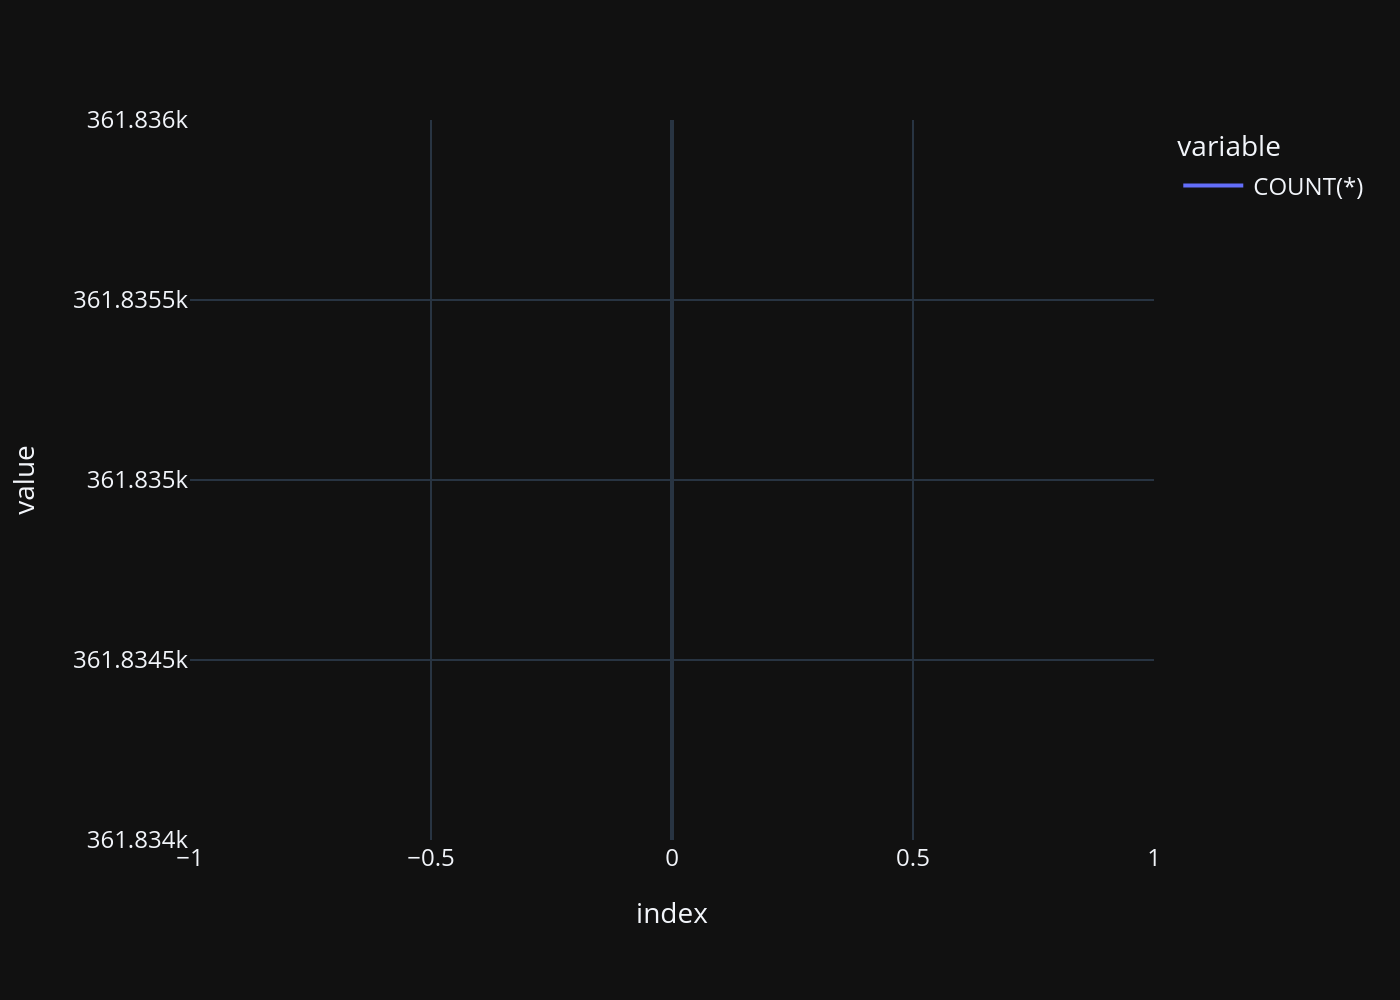

('SELECT COUNT(*) FROM players',
    COUNT(*)
 0    361835,
 Figure({
     'data': [{'hovertemplate': 'variable=COUNT(*)<br>index=%{x}<br>value=%{y}<extra></extra>',
               'legendgroup': 'COUNT(*)',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines',
               'name': 'COUNT(*)',
               'orientation': 'v',
               'showlegend': True,
               'type': 'scatter',
               'x': array([0]),
               'xaxis': 'x',
               'y': array([361835]),
               'yaxis': 'y'}],
     'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
 }))

In [19]:
vn.ask(question="How many players do we have in total ?")

SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n\n\n\nCREATE TABLE "players" (\n"LAST_NAME" TEXT,\n  "OTHER_NAMES" TEXT,\n  "MOBILE" INTEGER,\n  "PROMOTIONAL_CONSENT" TEXT,\n  "CREATED" TEXT,\n  "E_Score" INTEGER,\n  "Indicative_Segment" TEXT,\n  "Gear" INTEGER,\n  "D301" INTEGER,\n  "D304" INTEGER,\n  "D307" INTEGER,\n  "D308" INTEGER,\n  "D309" INTEGER,\n  "D310" INTEGER,\n  "D311" INTEGER,\n  "D312" INTEGER,\n  "D313" INTEGER,\n  "D314" INTEGER,\n  "D315" INTEGER,\n  "D316" INTEGER,\n  "D317" INTEGER,\n  "D318" INTEGER,\n  "D319" INTEGER,\n  "D320" INTEGER,\n  "D321" INTEGER,\n  "D322" INTEGER,\n  "D323" INTEGER,\n  "D324" INTEGER,\n  "D325" INTEGER,\n  "D326" INTEGER,\n  "D327" INTEGER,\n  "D328" INTEGER,\n  "D329" INTEGER,\n  "D330" INTEGER,\n  "D331" INTEGER,\n  "D332" I

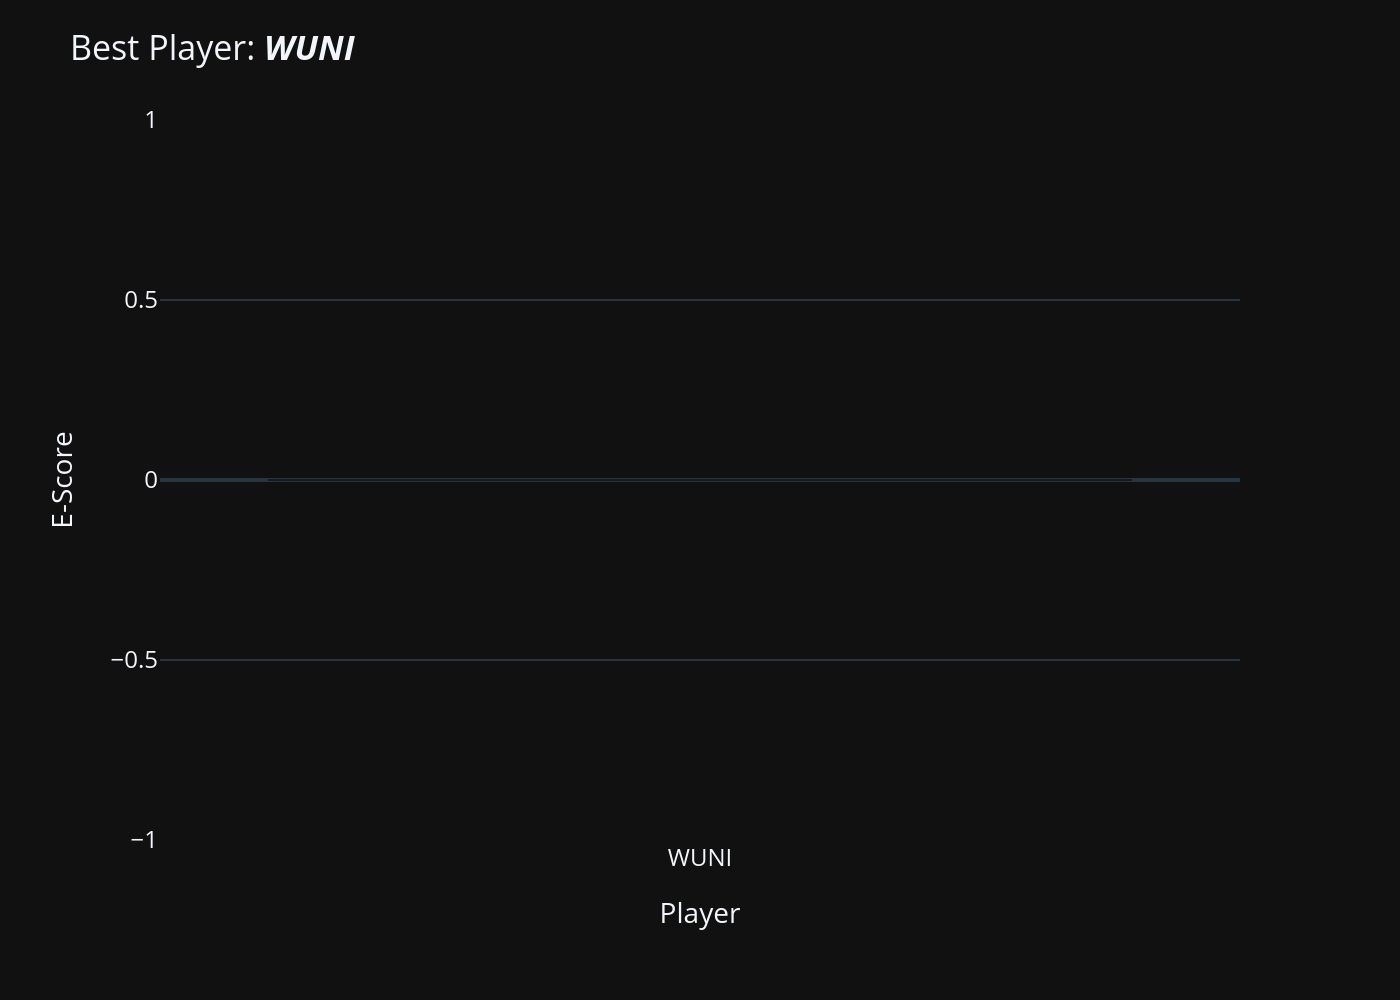

('SELECT LAST_NAME FROM players ORDER BY E_Score DESC LIMIT 1',
   LAST_NAME
 0      WUNI,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'x=%{x}<br>y=%{y}<br>text=%{text}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'text': array(['WUNI'], dtype=object),
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['WUNI'], dtype=object),
               'xaxis': 'x',
               'y': array([0]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'title': {'text': 'Best Player: <b><i>WUNI<br></b></i>'},
                'xaxis': {'anchor': '

In [20]:
vn.ask(question="Who is the best player ?")

In [ ]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn,allow_llm_to_see_data=True)
app.run()
